<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/INFO371_Week3_Evaluation_Scaling_Dimensionality_Scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO 371: Data Mining Applications

## Week 3: Evaluation, Scaling, Dimensionality, Scikiet Learn
### Prof. Charles Dorner, EdD (Candidate)
### College of Computing and Informatics, Drexel University

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

## Load Iris Flower Data Set


In [9]:
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df = pd.read_csv(url)  # Correct: load the CSV from the URL

In [10]:
df.shape

(150, 5)

In [11]:
species = df.species.unique()
species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Convert the target label to numeric values
```
label_maps = {'setosa':0, 'versicolor':1, 'virginica':2}
label_maps
```

In [12]:
label_maps = {'setosa':0, 'versicolor':1, 'virginica':2}
label_maps

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [13]:
y_train = df.species.map(label_maps)

### Extract training data
```
X_train = df.iloc[:, 0:-1]
```

In [14]:
X_train = df.iloc[:, 0:-1]

In [15]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Using KNN for Modeling and Prediction

```
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)
```

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier()

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
knn.predict(X_train)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_train, knn.predict(X_train))

0.9666666666666667

### Evaluate
Given a set of labeled data and a predictive model, every data point lies in one of
four categories:
• True positive (tp): “This message is spam, and we correctly predicted spam.”
• False positive (fp) (Type 1 Error): “This message is not spam, but we predicted spam.”
• False negative (fn) (Type 2 Error): “This message is spam, but we predicted not
spam.”
• True negative (tn): “This message is not spam, and we correctly predicted not spam.”

We often represent these as counts in a confusion matrix:

|      |positive | negative |
|------|------|------|
|positive|tp |fp|
|negative|fn | tn|

$accuracy = \frac{tp + tn}{tp + fp+tn+fn}$

$precision = \frac{tp}{tp+fp}$

$recall = \frac{tp}{tp+fn}$

$F1\_Score = \frac{2}{\frac{1}{recall} + \frac{1}{precision}} = \frac{2tp}{2tp + fp + fn}$

In [22]:
# import the metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [23]:
y_pred = knn.predict(X_train)

In [24]:
# evaluate the model accuracy on the training data
accuracy_score(y_train, y_pred)

0.9666666666666667

In [25]:
precision_recall_fscore_support(y_train, y_pred)

(array([1.        , 0.95918367, 0.94117647]),
 array([1.  , 0.94, 0.96]),
 array([1.        , 0.94949495, 0.95049505]),
 array([50, 50, 50]))

## Rescaling
Many techniques are sensitive to the scale of your data. For example, imagine that you
have a data set consisting of the heights and weights of hundreds of data scientists,
and that you are trying to identify clusters of body sizes.

Intuitively, we’d like clusters to represent points near each other, which means that we
need some notion of distance between points. We already have a Euclidean distance
function, so a natural approach might be to treat (height, weight) pairs as points in
two-dimensional space. Consider the people listed following table:

In [26]:
df = pd.DataFrame({"Person":['A', 'B', 'C'], "height (cm)":[160, 170.2, 177.8], "weight (pounds)":[150, 160, 171], "height (inches)":[63, 67, 70]})
df

,Person,height (cm),weight (pounds),height (inches)
0,A,160.0,150,63
1,B,170.2,160,67
2,C,177.8,171,70


The distances between the pairs of persons in terms of height (inches) and weight (pounds) are:

```
from scipy.spatial import distance
print("A to B: " + str(distance.euclidean(df.iloc[0, 2:], df.iloc[1, 2:])))
print("A to C: " + str(distance.euclidean(df.iloc[0, 2:], df.iloc[2, 2:])))
print("B to C: " + str(distance.euclidean(df.iloc[1, 2:], df.iloc[2, 2:])))

```

In [27]:
from scipy.spatial import distance
print("A to B: " + str(distance.euclidean(df.iloc[0, 2:], df.iloc[1, 2:])))
print("A to C: " + str(distance.euclidean(df.iloc[0, 2:], df.iloc[2, 2:])))
print("B to C: " + str(distance.euclidean(df.iloc[1, 2:], df.iloc[2, 2:])))

A to B: 10.770329614269007
A to C: 22.135943621178654
B to C: 11.40175425099138


The distnace between the pairs of persons in terms of height (cm) and weight (pounts) are:

```
print("A to B: " + str(distance.euclidean(df.iloc[0, 1::2], df.iloc[1, 1::2])))
print("A to C: " + str(distance.euclidean(df.iloc[0, 1::2], df.iloc[2, 1::2])))
print("B to C: " + str(distance.euclidean(df.iloc[1, 1::2], df.iloc[2, 1::2])))
```

In [28]:
print("A to B: " + str(distance.euclidean(df.iloc[0, 1:3], df.iloc[1, 1:3])))
print("A to C: " + str(distance.euclidean(df.iloc[0, 1:3], df.iloc[2, 1:3])))
print("B to C: " + str(distance.euclidean(df.iloc[1, 1:3], df.iloc[2, 1:3])))

A to B: 14.284257068535268
A to C: 27.52889391167034
B to C: 13.370115930686627


The nearest point to B is different using different units. Obviously it’s problematic if changing units can change results like this. For this reason,
when dimensions aren’t comparable with one another, we will sometimes rescale
our data so that each dimension has mean 0 and standard deviation 1. This effectively
gets rid of the units, converting each dimension to “standard deviations from the
mean.

The equation for scaling is $scaled = (data - mean) / standard\_deviation$

```
df_data = df.set_index('Person')
df_scaled = (df_data - df_data.mean(axis = 0)) / df_data.std(axis = 0)
df_scaled
```

In [29]:
df_data = df.set_index('Person')
df_scaled = (df_data - df_data.mean(axis = 0)) / df_data.std(axis = 0)
df_scaled

,height (cm),weight (pounds),height (inches)
Person,,,
A,-1.044980,-0.983755,-1.044074
B,0.097034,-0.031734,0.094916
C,0.947946,1.015489,0.949158


```
df_scaled.mean(axis = 0)
```

In [30]:
df_scaled.mean(axis = 0)

,0
height (cm),-9.992007e-16
weight (pounds),-8.881784e-16
height (inches),-1.332268e-15


```
df_scaled.std(axis = 0)
```

In [31]:
df_scaled.std(axis = 0)

,0
height (cm),1.0
weight (pounds),1.0
height (inches),1.0


```
# the distances using height in inches:
from scipy.spatial import distance
print("A to B: " + str(distance.euclidean(df_scaled.iloc[0, 1:], df_scaled.iloc[1, 1:])))
print("A to C: " + str(distance.euclidean(df_scaled.iloc[0, 1:], df_scaled.iloc[2, 1:])))
print("B to C: " + str(distance.euclidean(df_scaled.iloc[1, 1:], df_scaled.iloc[2, 1:])))
```

In [32]:
from scipy.spatial import distance
print("A to B: " + str(distance.euclidean(df_scaled.iloc[0, 1:], df_scaled.iloc[1, 1:])))
print("A to C: " + str(distance.euclidean(df_scaled.iloc[0, 1:], df_scaled.iloc[2, 1:])))
print("B to C: " + str(distance.euclidean(df_scaled.iloc[1, 1:], df_scaled.iloc[2, 1:])))

A to B: 1.4844668093876097
A to C: 2.8231103104442656
B to C: 1.3514460651057632


```
# the distances using height in cm:
from scipy.spatial import distance
print("A to B: " + str(distance.euclidean(df_scaled.iloc[0, 0:2], df_scaled.iloc[1, 0:2])))
print("A to C: " + str(distance.euclidean(df_scaled.iloc[0, 0:2], df_scaled.iloc[2, 0:2])))
print("B to C: " + str(distance.euclidean(df_scaled.iloc[1, 0:2], df_scaled.iloc[2, 0:2])))
```

In [33]:
from scipy.spatial import distance
print("A to B: " + str(distance.euclidean(df_scaled.iloc[0, 0:2], df_scaled.iloc[1, 0:2])))
print("A to C: " + str(distance.euclidean(df_scaled.iloc[0, 0:2], df_scaled.iloc[2, 0:2])))
print("B to C: " + str(distance.euclidean(df_scaled.iloc[1, 0:2], df_scaled.iloc[2, 0:2])))

A to B: 1.4867883610875932
A to C: 2.8228942865405533
B to C: 1.3493436242674308


## Using Scikit Learn to Scale

```
from sklearn.preprocessing import StandardScaler
```

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
df_data

,height (cm),weight (pounds),height (inches)
Person,,,
A,160.0,150,63
B,170.2,160,67
C,177.8,171,70


```
scaler = StandardScaler()
scaler.fit(df_data)
```

In [36]:
scaler = StandardScaler()
scaler.fit(df_data)

StandardScaler()

```
scaled = scaler.transform(df_data)
scaled
```

In [37]:
scaled = scaler.transform(df_data)
scaled

array([[-1.27983368, -1.20484922, -1.27872403],
       [ 0.1188417 , -0.0388661 ,  0.11624764],
       [ 1.16099199,  1.24371532,  1.16247639]])

```
scaled.mean(axis = 0)
```

In [38]:
scaled.mean(axis = 0)

array([-1.33226763e-15, -1.11022302e-15, -1.70234197e-15])

```
scaled.std(axis = 0)
```

In [39]:
scaled.std(axis = 0)

array([1., 1., 1.])

```
df_data.mean(axis = 0)
```

In [40]:
df_data.mean(axis = 0)

,0
height (cm),169.333333
weight (pounds),160.333333
height (inches),66.666667


```
scaler.mean_
```

In [41]:
scaler.mean_

array([169.33333333, 160.33333333,  66.66666667])

Unbiased sample variance: $\frac{\Sigma (x-\bar{x})^2}{n-1}$
```
df_data.var(axis = 0)
```

In [42]:
df_data.var(axis = 0)

,0
height (cm),79.773333
weight (pounds),110.333333
height (inches),12.333333


Population variance: $\frac{\Sigma (x-\bar{x})^2}{n}$
```
scaler.var_
```

In [43]:
scaler.var_

array([53.18222222, 73.55555556,  8.22222222])

In [ ]:
((160.0 - 169.3333)**2 + (170.2 - 169.3333)**2 + (177.8 - 169.3333)**2) / 3


53.18222222333338

## The Curse of Dimensionality
k-nearest neighbors runs into trouble in higher dimensions thanks to the “curse of
dimensionality,” which boils down to the fact that high-dimensional spaces are vast.
Points in high-dimensional spaces tend not to be close to one another at all. One way
to see this is by randomly generating pairs of points in the d-dimensional “unit cube”
in a variety of dimensions, and calculating the distances between them.

Let us define a function to compute a list (len = num_pairs) of distances between two points with dimensions $dim$:

```
from scipy.spatial import distance
import numpy as np
import random

def random_distances(dim, num_pairs):
    return [distance.euclidean(np.random.rand(dim), np.random.rand(dim))
            for _ in range(num_pairs)]
```

In [44]:
from scipy.spatial import distance
import numpy as np
import random

def random_distances(dim, num_pairs):
    dist_list = []
    for _ in range(num_pairs):
        first_point = np.random.rand(dim)
        second_point = np.random.rand(dim)
        dist = distance.euclidean(first_point, second_point)
        dist_list.append(dist)

    return dist_list

For a range of dimensions between 1 and 101 with stride 5, compute 10000 distances:

```
dimensions = range(1, 101, 5)

avg_distances = []
min_distances = []

random.seed(0)
for dim in dimensions:
     distances = random_distances(dim, 10000)  # 10,000 random pairs
     avg_distances.append(np.mean(distances))     # track the average
     min_distances.append(min(distances))      # track the minimum
     #print(dim, min(distances), mean(distances), min(distances) / mean(distances))
```

In [45]:
from scipy.spatial import distance
import numpy as np
import random

def random_distances(dim, num_pairs):
    return [distance.euclidean(np.random.rand(dim), np.random.rand(dim))
            for _ in range(num_pairs)]

In [46]:
dimensions = range(1, 101, 5)
avg_distances = []
min_distances = []

for dim in dimensions:
     distances = random_distances(dim, 10000)  # 10,000 random pairs
     avg_distances.append(np.mean(distances))     # track the average
     min_distances.append(min(distances))      # track the minimum

Plot the ratio between mininum distances and averge distances as the dimension increases:

```
plt.plot(list(dimensions), list(np.array(min_distances) / np.array(avg_distances)))
```

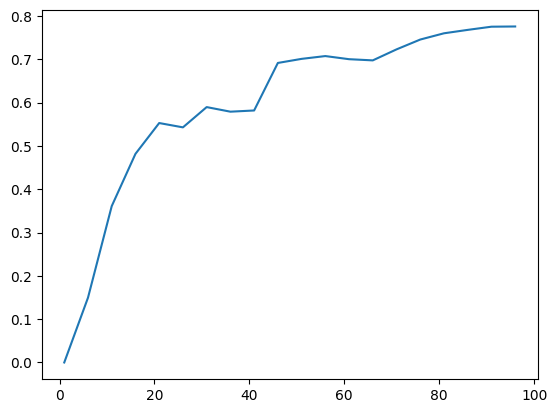

In [47]:
plt.plot(list(dimensions), list(np.array(min_distances) / np.array(avg_distances)))

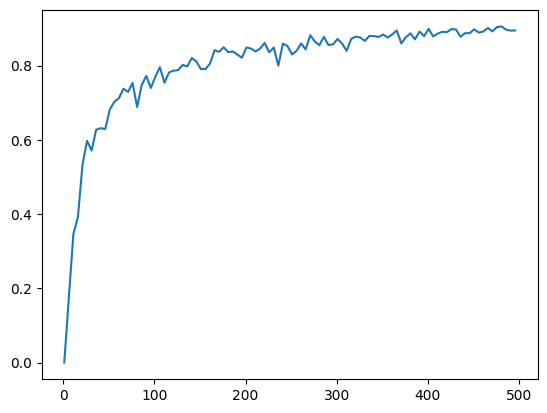

In [48]:
dimensions = range(1, 501, 5)
avg_distances = []
min_distances = []

for dim in dimensions:
     distances = random_distances(dim, 10000)  # 10,000 random pairs
     avg_distances.append(np.mean(distances))     # track the average
     min_distances.append(min(distances))      # track the minimum

plt.plot(list(dimensions), list(np.array(min_distances) / np.array(avg_distances)))

- In low-dimensional data sets, the closest points tend to be much closer than average.
- But two points are close only if they’re close in every dimension, and every extra dimension—even if just noise—is another opportunity for each point to be further away from every other point.
- When you have a lot of dimensions, it’s likely that the
closest points aren’t much closer than average, which means that two points being close doesn’t mean very much (unless there’s a lot of structure in your data that makes it behave as if it were much lower-dimensional).

- A different way of thinking about the problem involves the sparsity of higher dimensional spaces.

- If you pick 50 random numbers between 0 and 1, you’ll probably get a pretty good
sample of the unit interval:

![](https://i.imgur.com/c1tJvpd.png)

If you pick 50 random points in the unit square, you’ll get less coverage:

![](https://i.imgur.com/uMPJTHx.png)

And in three dimensions less still:

![](https://i.imgur.com/jgjT5al.png)

So if you’re trying to use nearest neighbors in higher dimensions, it’s probably a good
idea to do some kind of dimensionality reduction first.

## Python ML Package: Scikit Learn

Scikit Learn API: https://scikit-learn.org/stable/api/index.html

KNN implemented in Scikit Learn:
- The package `sklearn.neighbors` provides functionality for unsupervised and supervised neighbors-based learning methods. Despite its simplicity, nearest neighbors has been successful in a large number of classification and regression problems, including handwritten digits or satellite image scenes. Being a non-parametric and instance-based method, it is often successful in classification situations where the decision boundary is very irregular.

- scikit-learn implements two different nearest neighbors classifiers: KNeighborsClassifier implements learning based on the k nearest neighbors of each query point, where k is an integer value specified by the user. RadiusNeighborsClassifier implements learning based on the number of neighbors within a fixed radius r of each training point, where r is a floating-point value specified by the user.

- The k-neighbors classification in KNeighborsClassifier is the more commonly used of the two techniques. The optimal choice of the value k is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct.

- The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. This can be accomplished through the weights keyword. The default value, weights = 'uniform', assigns uniform weights to each neighbor. weights = 'distance' assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied which is used to compute the weights.